   # Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285369,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704983,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# %matplotlib inline

In [8]:
# import matplotlib.pyplot as plt
# histogram 
# housing.hist(bins=50, figsize=(20,15));



## Train- test Spliting

In [9]:
# for learning purpose
# import numpy as np

# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
# #     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set , test_set = split_train_test(housing,0.2)

In [11]:
# print(f"row in tarin set:{len(train_set)} \n rows in test_set : {len(test_set)}")

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state =42)


In [14]:
print(f"Rows in tarin set:{len(train_set)} \nRows in test_set : {len(test_set)}")

Rows in tarin set:404 
Rows in test_set : 102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [16]:
# strat_test_set['CHAS'].value_counts() #95/7
# strat_train_set['CHAS'].value_counts() #376/28

In [17]:
housing= strat_train_set.copy()

## Looking for Correlations

In [18]:
corr_matrix  = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 minifg strong +ve correlation

MEDV       1.000000
RM         0.679889
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix
attributes= ['RM','ZN','MEDV','LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8));

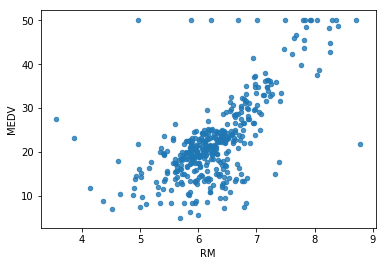

In [20]:
housing.plot(kind="scatter",x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute Combinations

In [21]:
# housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
corr_matrix  = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 minifg strong +ve correlation

MEDV       1.000000
RM         0.679889
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [23]:
# housing.plot(kind="scatter",x="TAXRM", y="MEDV", alpha=0.8);

In [24]:
housing  = strat_train_set.drop("MEDV", axis =1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute

In [25]:
median = housing['RM'].median() # compute median and past
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
housing.describe() #before fillig 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280782,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716018,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
X= imputer.transform(housing)

In [30]:
housing_tr= pd.DataFrame(X, columns=housing.columns)

In [31]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280116,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712487,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primerly Three types of objects

    1. Estimators - estamate some parameters besed on a data shets Eg. Imputer 
    It has a fit method and transform method.
    
    2. Transformers - transform method takes input and return output based on the learnings from fit().It also has a convenince
    function called fit_transform().
    
    3. Predictors - LinearRegression model is an example, (fit , predict is common function. It also gives score function 
    which will evalute the predictions)

## Feature Scaling

Primarlytwo types of feature scaling method
1. Min-max scaling (Normalization)
    (value - min)/ (max- min)
    Sklearn provide class MinMaxScaller for this
2. Standardization 
    (value - mean)/standerd devation
    Sklearn class - StanderdScaler for this

## Creating a pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipelinr = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     ..... add as meny as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [33]:
housing_num_tr= my_pipelinr.fit_transform(housing)

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estate

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [37]:
prepare_data = my_pipelinr.transform(some_data)

In [38]:
model.predict(prepare_data)

array([22.424, 25.488, 16.462, 23.256, 23.527])

In [39]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model 

In [40]:
from sklearn.metrics import mean_squared_error
housing_predications = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predications)
rmse = np.sqrt(mse)

In [41]:
rmse

1.236452387852335

## Using better evaluation techniquw- Cross Validation

In [42]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-score)

In [43]:
rmse_score

array([2.9091443 , 2.92715516, 4.47600318, 2.63903046, 3.28140905,
       2.69177547, 4.93853732, 3.30445173, 3.06257955, 3.23044896])

In [44]:
def print_scores(scores):
    print(f"Scores: {scores} \nMean: {scores.mean()} \nStandard deviation: {scores.std()} ")
    

In [45]:
print_scores(rmse_score)

Scores: [2.9091443  2.92715516 4.47600318 2.63903046 3.28140905 2.69177547
 4.93853732 3.30445173 3.06257955 3.23044896] 
Mean: 3.346053517423259 
Standard deviation: 0.7215780818695603 


Quiz: Convert This notebook in pythonfile 

## Saving the model

In [47]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the model

In [49]:
X_test = strat_test_set.drop('MEDV', axis =1)
y_test = strat_test_set['MEDV'].copy()
X_test_prepered = my_pipelinr.transform(X_test)
final_predictions = model.predict(X_test_prepered)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [50]:
final_rmse

2.9351984383596643

In [54]:
final_predictions,list(y_test)

(array([24.404, 11.19 , 26.533, 21.785, 18.526, 14.907, 19.981, 14.735,
        32.05 , 40.733, 19.542, 12.008, 23.343, 28.83 , 19.565, 10.891,
        31.069, 14.475, 23.555, 18.975, 19.967, 17.768, 17.996, 21.703,
        18.725, 31.324, 16.022, 33.083,  9.148, 33.472, 24.003, 21.4  ,
        22.913, 10.997, 20.962, 11.44 , 41.696, 24.581, 23.36 , 42.691,
        24.068, 30.789, 20.662, 20.649, 18.525, 33.089, 45.745, 20.095,
        20.279, 21.786, 21.845, 14.577, 21.374, 14.666, 25.496, 33.413,
        42.274, 28.515, 19.23 , 20.502, 46.413,  9.74 , 18.947, 25.528,
        14.724, 32.594, 19.157, 18.06 , 19.249, 34.371, 26.261, 22.801,
        21.278, 22.566, 34.858, 13.117, 15.606, 20.153, 20.693, 21.391,
        22.466, 20.822, 13.672, 23.086, 20.339, 21.443, 13.604, 20.988,
        21.687, 23.188, 18.259, 26.921,  6.864, 26.827, 18.731, 29.625,
        20.114, 31.247, 14.269, 26.786, 21.789, 20.236]),
 [16.5,
  10.2,
  30.1,
  23.0,
  14.4,
  15.6,
  19.4,
  14.1,
  30.3,
  35.2

In [55]:
prepare_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24187059, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using The model

In [56]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-10.43942006,  0.12628155, 1.12165014, -0.27288841, -1.42262747,
       -0.24187059, 1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([23.261])